In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import warnings

In [370]:
warnings.filterwarnings('ignore')

In [371]:
name = "TCS.NS"
stock=yf.download(name,period="3y",actions=True)
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-04-05,3171.000000,3263.000000,3151.000000,3238.899902,3050.481201,5317862,0.0,0.0
2021-04-06,3275.000000,3275.000000,3230.000000,3264.699951,3074.780518,2291562,0.0,0.0
2021-04-07,3259.000000,3277.550049,3234.800049,3271.399902,3081.090576,2491268,0.0,0.0
2021-04-08,3270.000000,3335.000000,3266.050049,3317.350098,3124.367676,2578118,0.0,0.0
2021-04-09,3354.000000,3354.350098,3308.000000,3322.250000,3128.982178,2911129,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-01,3897.699951,3933.300049,3888.050049,3916.750000,3916.750000,1569676,0.0,0.0
2024-04-02,3890.000000,3909.850098,3873.000000,3883.800049,3883.800049,2142666,0.0,0.0
2024-04-03,3851.000000,3981.000000,3851.000000,3947.300049,3947.300049,3973090,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

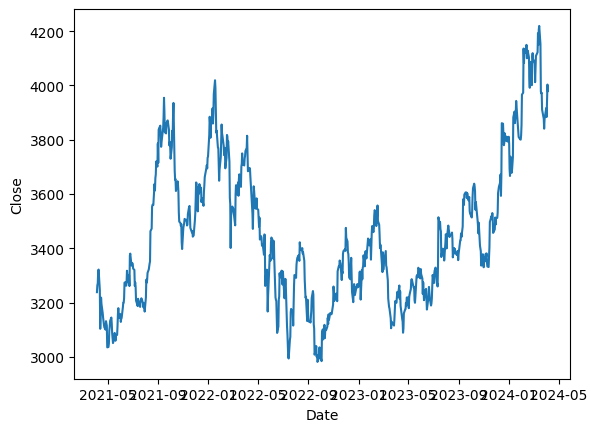

In [372]:
sns.lineplot(data=stock,x="Date",y="Close")

In [373]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

558

In [374]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.20760577],
       [0.22845935],
       [0.23387477],
       [0.27101525],
       [0.27497572],
       [0.21378921],
       [0.09860977],
       [0.19148069],
       [0.17224366],
       [0.14528775],
       [0.13134498],
       [0.11053185],
       [0.10301484],
       [0.09598287],
       [0.12120106],
       [0.11481576],
       [0.10766243],
       [0.04332352],
       [0.04441477],
       [0.0547203 ],
       [0.09186058],
       [0.10459094],
       [0.12192843],
       [0.1321128 ],
       [0.11360334],
       [0.08531365],
       [0.05613478],
       [0.07088583],
       [0.08628355],
       [0.08078723],
       [0.06300514],
       [0.07957481],
       [0.08038309],
       [0.10665208],
       [0.1426204 ],
       [0.15999835],
       [0.13057715],
       [0.1431457 ],
       [0.13817488],
       [0.11913992],
       [0.12867762],
       [0.13069832],
       [0.1625848 ],
       [0.17628505],
       [0.17636596],
       [0.18974298],
       [0.23581475],
       [0.237

In [375]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [376]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(498, 60, 1)

In [377]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [378]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [379]:
model.fit(x_train,y_train,epochs=8,batch_size=1)

Epoch 1/8


498/498 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0140
Epoch 2/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0044
Epoch 3/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0033
Epoch 4/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0027
Epoch 5/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0021
Epoch 6/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0023
Epoch 7/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0018
Epoch 8/8
498/498 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0017


In [380]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [381]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [382]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [383]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

62.2208258530234

In [384]:
closes=[]
closes.extend(data['Close'])
average_close = sum(closes) / len(closes)
#print(average_close)
average_deviation=rmse/average_close*100
average_deviation

1.8015702567886778

In [385]:
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions

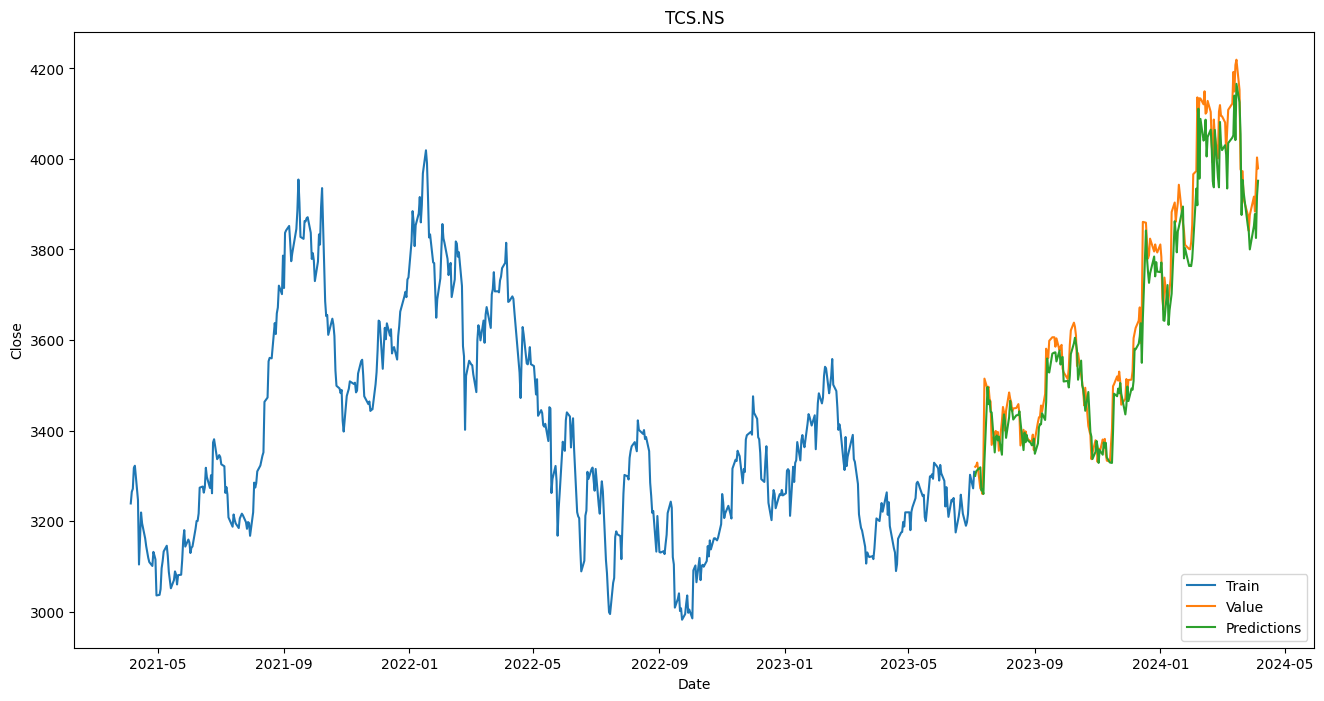

In [386]:
plt.figure(figsize=(16,8))
plt.title(name)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [387]:
trace_train = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace_valid = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Value')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Define layout
layout = go.Layout(title='Model', xaxis=dict(title='Date'), yaxis=dict(title='Close'), legend=dict(x=0, y=1))

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)
pio.show(fig)

In [388]:
valid

,Close,Predictions
Date,,
2023-07-05,3319.949951,3299.924805
2023-07-06,3322.899902,3309.902100
2023-07-07,3329.250000,3312.535645
2023-07-10,3271.949951,3318.741455
2023-07-11,3272.399902,3267.647949
...,...,...
2024-04-01,3916.750000,3851.962646
2024-04-02,3883.800049,3878.352539
2024-04-03,3947.300049,3825.409180
